In [1]:
  from scipy import linalg as la

In [2]:
from scipy import optimize

In [3]:
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from __future__ import division

In [5]:
 A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A.rank()

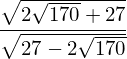

In [6]:
 A.condition_number()

In [7]:
 sympy.N(_)

In [8]:
 A.norm()

In [9]:
 A = np.array([[2, 3], [5, 4]])
In [15]: b = np.array([4, 3])
In [16]: np.linalg.matrix_rank(A)

2

In [10]:
 np.linalg.cond(A)

In [11]:
 np.linalg.norm(A)

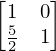

In [12]:
 A = sympy.Matrix([[2, 3], [5, 4]])
In [20]: b = sympy.Matrix([4, 3])
In [21]: L, U, _ = A.LUdecomposition()
In [22]: L

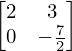

In [13]:
U

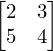

In [14]:
 L * U

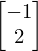

In [15]:
 x = A.solve(b); x # equivalent to A.LUsolve(b)

In [16]:
 A = np.array([[2, 3], [5, 4]])
In [27]: b = np.array([4, 3])
In [28]: P, L, U = la.lu(A)
In [29]: L

array([[1. , 0. ],
       [0.4, 1. ]])

In [21]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [22]:
la.solve(A, b)

array([-1.,  2.])

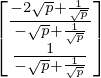

In [23]:
p = sympy.symbols("p", positive=True)
In [34]: A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
In [35]: b = sympy.Matrix([1, 2])
In [36]: x = A.solve(b)
In [37]: x

Text(0.5, 0, '$p$')

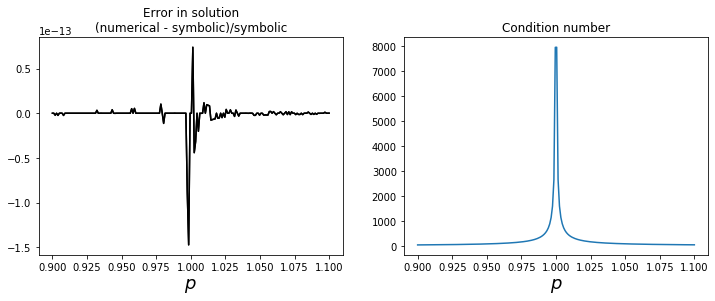

In [28]:
 # Symbolic problem specification
...: p = sympy.symbols("p", positive=True)
...: A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
...: b = sympy.Matrix([1, 2])
...:
...: # Solve symbolically
...: x_sym_sol = A.solve(b)
...: Acond = A.condition_number().simplify()
...:
...: # Numerical problem specification
...: AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
...: bb = np.array([1, 2])
...: x_num_sol = lambda p: np.linalg.solve(AA(p), bb)
...:
...: # Graph the difference between the symbolic (exact) and numerical results.
...: fig, axes = plt.subplots(1, 2, figsize=(12, 4))
...:
...: p_vec = np.linspace(0.9, 1.1, 200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in
p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
...: axes[0].set_xlabel(r'$p$', fontsize=18)
...:
...: axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
...: axes[1].set_title("Condition number")
...: axes[1].set_xlabel(r'$p$', fontsize=18)
                

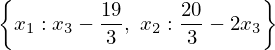

In [29]:
 x_vars = sympy.symbols("x_1, x_2, x_3")
In [40]: A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
In [41]: x = sympy.Matrix(x_vars)
In [42]: b = sympy.Matrix([7, 8])
In [43]: sympy.solve(A*x - b, x_vars)

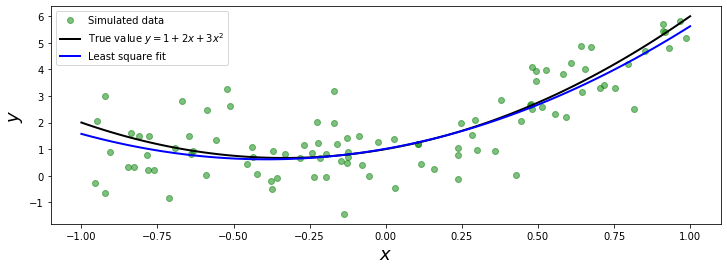

In [31]:
 # define true model parameters
...: x = np.linspace(-1, 1, 100)
...: a, b, c = 1, 2, 3
...: y_exact = a + b * x + c * x**2
...:
...: # simulate noisy data
...: m = 100
...: X = 1 - 2 * np.random.rand(m)
...: Y = a + b * X + c * X**2 + np.random.randn(m)
...:
...: # fit the data to the model using linear least square
...: A = np.vstack([X**0, X**1, X**2]) # see np.vander for alternative
...: sol, r, rank, sv = la.lstsq(A.T, Y)
...:
...: y_fit = sol[0] + sol[1] * x + sol[2] * x**2
...: fig, ax = plt.subplots(figsize=(12, 4))
...:
...: ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
...: ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x +3x^2$')
...: ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
...: ax.set_xlabel(r"$x$", fontsize=18)
...: ax.set_ylabel(r"$y$", fontsize=18)
...: ax.legend(loc=2)

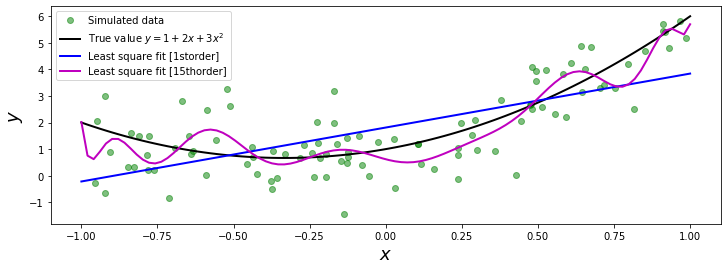

In [34]:
 # fit the data to the model using linear least square:
...: # 1st order polynomial
...: A = np.vstack([X**n for n in range(2)])
...: sol, r, rank, sv = la.lstsq(A.T, Y)
...: y_fit1 = sum([s * x**n for n, s in enumerate(sol)])
...:
...: # 15th order polynomial
...: A = np.vstack([X**n for n in range(16)])
...: sol, r, rank, sv = la.lstsq(A.T, Y)
...: y_fit15 = sum([s * x**n for n, s in enumerate(sol)])
...:
...: fig, ax = plt.subplots(figsize=(12, 4))
...: ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
...: ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x +3x^2$')
...: ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1storder]')
...: ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15thorder]')
...: ax.set_xlabel(r"$x$", fontsize=18)
...: ax.set_ylabel(r"$y$", fontsize=18)
...: ax.legend(loc=2)
            

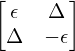

In [35]:
 eps, delta = sympy.symbols("epsilon, Delta")
In [47]: H = sympy.Matrix([[eps, delta], [delta, -eps]])
In [48]: H

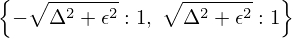

In [36]:
 H.eigenvals()

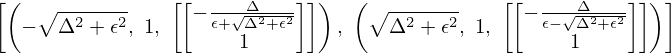

In [37]:
H.eigenvects()

In [38]:
 (eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
In [52]: sympy.simplify(evec1[0].T * evec2[0])

In [39]:
 A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
In [54]: evals, evecs = la.eig(A)
In [55]: evals
    

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [40]:
 evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [41]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

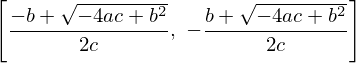

In [42]:
x, a, b, c = sympy.symbols("x, a, b, c")
In [59]: sympy.solve(a + b*x + c*x**2, x)

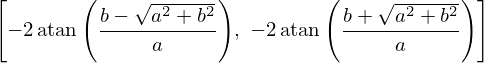

In [44]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

In [45]:
sympy.solve(sympy.sin(x)-x, x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

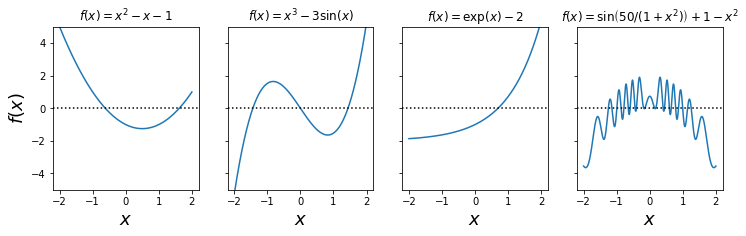

In [47]:
 x = np.linspace(-2, 2, 1000)
...: # four examples of nonlinear functions
...: f1 = x**2 - x - 1
...: f2 = x**3 - 3 * np.sin(x)
...: f3 = np.exp(x) - 2
...: f4 = 1 - x**2 + np.sin(50 / (1 + x**2))
...:
...: # plot each function
...: fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
...:
for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
axes[0].set_ylabel(r'$f(x)$', fontsize=18)
...:
...: titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

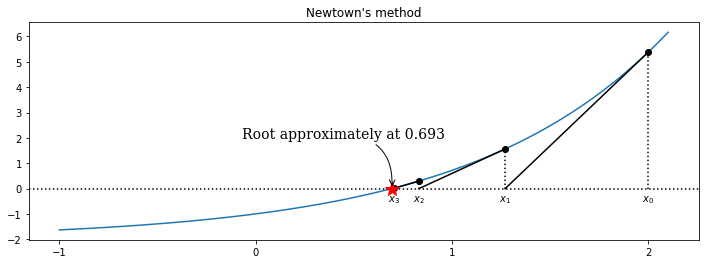

In [56]:
 # define a function, desired tolerance and starting point xk
...: tol = 0.01
...: xk = 2
...:
...: s_x = sympy.symbols("x")
...: s_f = sympy.exp(s_x) - 2
...:
...: f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
...: fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)
...:
...: x = np.linspace(-1, 2.1, 1000)
...:
...: # setup a graph for visualizing the root finding steps
...: fig, ax = plt.subplots(1, 1, figsize=(12, 4))
...: ax.plot(x, f(x))
...: ax.axhline(0, ls=':', color='k')
...:
...: # iterate Newton's method until convergence to the desiredtolerance has been reached
...: n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)
    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')
    
    xk = xk_new
    n += 1
...:
...: ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk, fontsize=14, family="serif",
xy=(xk, f(xk)), xycoords='data',
xytext=(-150, +50), textcoords='offset points',arrowprops=dict(arrowstyle="->",
connectionstyle="arc3, rad=-.5"))
...:
...: ax.set_title("Newtown's method")
...: ax.set_xticks([-1, 0, 1, 2])

In [57]:
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [63]:
 def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

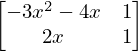

In [64]:
 x, y = sympy.symbols("x, y")
In [76]: f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
In [77]: f_mat.jacobian(sympy.Matrix([x, y]))

In [66]:
def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]
In [79]: optimize.fsolve(f, [1, 1], fprime=f_jacobian)

Text(0.5, 0, '$x$')

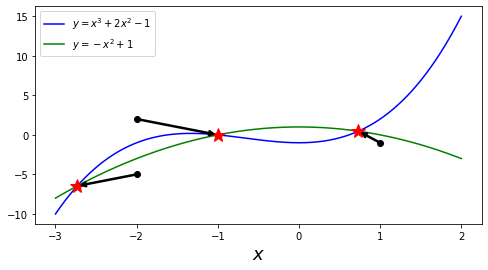

In [74]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1,x[1] + x[0]**2 - 1]
x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0],
x_guess[1]),arrowprops=dict(arrowstyle="->", linewidth=2.5))
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)

NameError: name 'colors' is not defined

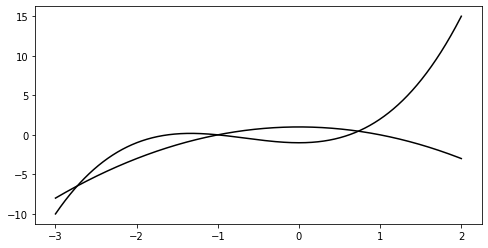

In [76]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5)
ax.plot(x, y2, 'k', lw=1.5)

sol1 = optimize.fsolve(f, [-2, 2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])
sols = [sol1, sol2, sol3]
for idx, s in enumerate(sols):
    ax.plot(s[0], s[1], colors[idx]+'*', markersize=15)
colors = ['r', 'b', 'g']
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)
        idx = (abs(sols - sol)**2).sum(axis=1).argmin()
        ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
ax.set_xlabel(r'$x$', fontsize=18)